In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
#!pip install 

In [15]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from gensim import models
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime
from scipy.sparse import coo_matrix, hstack 
from sklearn.model_selection import RandomizedSearchCV

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers.normalization import BatchNormalization
from keras.layers import Input
from keras.layers import Flatten
from keras.preprocessing.sequence import pad_sequences
from keras.initializers import he_normal,glorot_normal
from keras.regularizers import l1,l2
from scipy.sparse import hstack
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorboardcolab import * 
from keras.optimizers import *
from keras.models import Model
from keras.layers import concatenate
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.preprocessing import text, sequence
from keras import utils 

In [20]:
pure_df = pd.read_csv('pure_df.csv')
pure_df.head(5) 

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tags_count,tags_2,pre_pro_title,pre_pro_plot_synopsis,pre_pro_tags
0,0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5,cult horror gothic murder atmospheric,tre volti della paura,note synopsis orginal italian release segments...,cult horror gothic murder atmospheric
1,1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1,violence,dungeons dragons book vile darkness,two thousand years ago nhagruul foul sorcerer ...,violence
2,2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1,romantic,shop around corner,matuschek gift store budapest workplace alfred...,romantic
3,3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,4,inspiring romantic stupid feel-good,mr holland opus,glenn holland not morning person anyone standa...,inspiring romantic stupid feel-good
4,4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,10,cruelty murder dramatic cult violence atmosphe...,scarface,may 1980 cuban man named tony montana al pacin...,cruelty murder dramatic cult violence atmosphe...


<h3>Topic_Modelling</h3>
 code_ref : <a href>https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/</a>

In [21]:
pure_df['pre_pro_plot_synopsis_words']=pure_df['pre_pro_plot_synopsis'].apply(lambda x: x.split())
pure_df.head()

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tags_count,tags_2,pre_pro_title,pre_pro_plot_synopsis,pre_pro_tags,pre_pro_plot_synopsis_words
0,0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5,cult horror gothic murder atmospheric,tre volti della paura,note synopsis orginal italian release segments...,cult horror gothic murder atmospheric,"[note, synopsis, orginal, italian, release, se..."
1,1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1,violence,dungeons dragons book vile darkness,two thousand years ago nhagruul foul sorcerer ...,violence,"[two, thousand, years, ago, nhagruul, foul, so..."
2,2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1,romantic,shop around corner,matuschek gift store budapest workplace alfred...,romantic,"[matuschek, gift, store, budapest, workplace, ..."
3,3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,4,inspiring romantic stupid feel-good,mr holland opus,glenn holland not morning person anyone standa...,inspiring romantic stupid feel-good,"[glenn, holland, not, morning, person, anyone,..."
4,4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,10,cruelty murder dramatic cult violence atmosphe...,scarface,may 1980 cuban man named tony montana al pacin...,cruelty murder dramatic cult violence atmosphe...,"[may, 1980, cuban, man, named, tony, montana, ..."


In [0]:
# Create Dictionary
id2word = corpora.Dictionary(pure_df['pre_pro_plot_synopsis_words'])

# Create Corpus
texts = pure_df['pre_pro_plot_synopsis_words']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [0]:
# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 4), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 5), (38, 2), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 1), (55, 4), (56, 3), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 2), (72, 5), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 3), (82, 1), (83, 6), (84, 2), (85, 1), (86, 1), (87, 2), (88, 1), (89, 2), (90, 2), (91, 1), (92, 1), (93, 1), (94, 2), (95, 4), (96, 1), (97, 5), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 2)

In [0]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('19th', 1),
  ('abandoned', 2),
  ('abby', 1),
  ('absence', 1),
  ('acquisition', 1),
  ('actually', 1),
  ('agrees', 2),
  ('aid', 2),
  ('air', 1),
  ('alfonsi', 1),
  ('ali', 2),
  ('already', 1),
  ('also', 2),
  ('anderson', 1),
  ('anticipating', 1),
  ('apartment', 4),
  ('apparently', 1),
  ('appearance', 2),
  ('appears', 1),
  ('arms', 1),
  ('around', 1),
  ('arrival', 1),
  ('arrives', 2),
  ('ask', 1),
  ('assailed', 2),
  ('attacked', 1),
  ('attempts', 1),
  ('attracted', 1),
  ('attractive', 1),
  ('await', 1),
  ('awaken', 1),
  ('awakened', 1),
  ('awakens', 1),
  ('away', 1),
  ('back', 2),
  ('basement', 1),
  ('battle', 1),
  ('bed', 5),
  ('beg', 2),
  ('begin', 1),
  ('beginning', 1),
  ('begs', 2),
  ('beheaded', 1),
  ('beheads', 1),
  ('behind', 1),
  ('believes', 1),
  ('belongs', 1),
  ('beset', 1),
  ('best', 1),
  ('bite', 1),
  ('bites', 1),
  ('bits', 1),
  ('blade', 1),
  ('blood', 3),
  ('bode', 1),
  ('body', 4),
  ('boris', 3),
  ('branches', 1),

In [0]:
#We need to run below steps before giving path to mallet because colab cannot access mallet from drive so we 
#need to upload entire mallet files here and also upgrade the gensim and install java for mallet 

#---------------------------step-1-------------------------------------------------------- -
'''
!pip install --upgrade gensim


#----------------------------step-2---------------------------------------------------------

import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()


#----------------------------step-3----------------------------------------------------------
#below command directly download mallet zip file  into colab disk next line is we can unzip it and use that path to mallet 

!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip
'''
#refer this https://github.com/polsci/colab-gensim-mallet


'\n!pip install --upgrade gensim\n\n\n#----------------------------step-2---------------------------------------------------------\n\nimport os       #importing os to set environment variable\ndef install_java():\n  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk\n  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable\n  !java -version       #check java version\ninstall_java()\n\n\n#----------------------------step-3----------------------------------------------------------\n#below command directly download mallet zip file  into colab disk next line is we can unzip it and use that path to mallet \n\n!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip\n!unzip mallet-2.0.8.zip\n'

In [0]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/content/mallet-2.0.8/bin/mallet' # update this path


In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus,
                                                        texts=pure_df['pre_pro_plot_synopsis_words'],
                                                        start=2, limit=40, step=6)

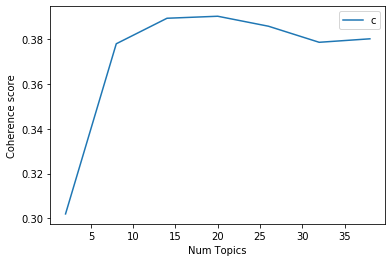

Num Topics = 2  has Coherence Value of 0.302
Num Topics = 8  has Coherence Value of 0.378
Num Topics = 14  has Coherence Value of 0.3894
Num Topics = 20  has Coherence Value of 0.3903
Num Topics = 26  has Coherence Value of 0.3858
Num Topics = 32  has Coherence Value of 0.3786
Num Topics = 38  has Coherence Value of 0.3802


In [0]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=20,random_state=100,update_every=1,chunksize=100,passes=10,alpha='auto',
                                           per_word_topics=True)

In [0]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]
data = pure_df['pre_pro_plot_synopsis'].tolist()

[(0, '0.009*"earth" + 0.009*"ship" + 0.008*"world" + 0.006*"island" + 0.006*"crew" + 0.005*"betty" + 0.005*"dr" + 0.005*"control" + 0.005*"city" + 0.005*"human"'), (1, '0.007*"king" + 0.006*"fight" + 0.005*"one" + 0.005*"death" + 0.005*"kill" + 0.004*"however" + 0.004*"help" + 0.003*"two" + 0.003*"queen" + 0.003*"battle"'), (2, '0.066*"charlie" + 0.044*"joe" + 0.038*"frank" + 0.029*"helen" + 0.021*"jeff" + 0.020*"kit" + 0.017*"emma" + 0.017*"c" + 0.015*"n" + 0.015*"nina"'), (3, '0.012*"war" + 0.007*"men" + 0.006*"army" + 0.006*"soldiers" + 0.006*"american" + 0.005*"british" + 0.005*"captain" + 0.005*"group" + 0.005*"german" + 0.005*"general"'), (4, '0.025*"eric" + 0.022*"matt" + 0.021*"casey" + 0.021*"arthur" + 0.018*"jenny" + 0.015*"zombies" + 0.014*"ogami" + 0.013*"godfrey" + 0.012*"wolf" + 0.011*"vera"'), (5, '0.045*"george" + 0.034*"jerry" + 0.025*"chris" + 0.024*"bugs" + 0.017*"roy" + 0.016*"kate" + 0.015*"anna" + 0.014*"logan" + 0.011*"joanna" + 0.011*"jonathan"'), (6, '0.022*"ma

In [0]:
%%time
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list  in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list 
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

CPU times: user 9min 59s, sys: 3min 19s, total: 13min 19s
Wall time: 9min 31s


In [0]:
df_dominant_topic.to_csv('drive/My Drive/colab/topic_modelling_data.csv',index=False) 

In [22]:
df_dominant_topic =  pd.read_csv('topic_modelling_data.csv')

In [23]:
pure_df.head(3)

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tags_count,tags_2,pre_pro_title,pre_pro_plot_synopsis,pre_pro_tags,pre_pro_plot_synopsis_words
0,0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5,cult horror gothic murder atmospheric,tre volti della paura,note synopsis orginal italian release segments...,cult horror gothic murder atmospheric,"[note, synopsis, orginal, italian, release, se..."
1,1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1,violence,dungeons dragons book vile darkness,two thousand years ago nhagruul foul sorcerer ...,violence,"[two, thousand, years, ago, nhagruul, foul, so..."
2,2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1,romantic,shop around corner,matuschek gift store budapest workplace alfred...,romantic,"[matuschek, gift, store, budapest, workplace, ..."


In [24]:
df_dominant_topic.head(3)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,12.0,0.2685,"house, find, back, finds, body, car, room, man...",note synopsis orginal italian release segments...
1,1,1.0,0.3064,"king, fight, one, death, kill, however, help, ...",two thousand years ago nhagruul foul sorcerer ...
2,2,19.0,0.3600,"father, not, family, mother, love, one, life, ...",matuschek gift store budapest workplace alfred...


In [25]:
final_model=pd.concat([pure_df,df_dominant_topic], axis=1)
final_model.head() 

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tags_count,tags_2,pre_pro_title,pre_pro_plot_synopsis,pre_pro_tags,pre_pro_plot_synopsis_words,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5,cult horror gothic murder atmospheric,tre volti della paura,note synopsis orginal italian release segments...,cult horror gothic murder atmospheric,"[note, synopsis, orginal, italian, release, se...",0,12.0,0.2685,"house, find, back, finds, body, car, room, man...",note synopsis orginal italian release segments...
1,1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1,violence,dungeons dragons book vile darkness,two thousand years ago nhagruul foul sorcerer ...,violence,"[two, thousand, years, ago, nhagruul, foul, so...",1,1.0,0.3064,"king, fight, one, death, kill, however, help, ...",two thousand years ago nhagruul foul sorcerer ...
2,2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1,romantic,shop around corner,matuschek gift store budapest workplace alfred...,romantic,"[matuschek, gift, store, budapest, workplace, ...",2,19.0,0.3600,"father, not, family, mother, love, one, life, ...",matuschek gift store budapest workplace alfred...
3,3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,4,inspiring romantic stupid feel-good,mr holland opus,glenn holland not morning person anyone standa...,inspiring romantic stupid feel-good,"[glenn, holland, not, morning, person, anyone,...",3,19.0,0.3882,"father, not, family, mother, love, one, life, ...",glenn holland not morning person anyone standa...
4,4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb,10,cruelty murder dramatic cult violence atmosphe...,scarface,may 1980 cuban man named tony montana al pacin...,cruelty murder dramatic cult violence atmosphe...,"[may, 1980, cuban, man, named, tony, montana, ...",4,10.0,0.2406,"police, jack, money, kill, killed, car, sam, g...",may 1980 cuban man named tony montana al pacin...


In [0]:
x_train = final_model.loc[(final_model['split'] == 'train')]
x_cv = final_model.loc[(final_model['split'] == 'val')]
x_test = final_model.loc[(final_model['split'] == 'test')]

y_train_71 = x_train['pre_pro_tags']
y_cv_71 = x_cv['pre_pro_tags']
y_test_71 = x_test['pre_pro_tags']


#Convert the tags to binary vectors
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true')
y_train_71 = vectorizer.fit_transform(y_train_71)
y_cv_71 = vectorizer.transform(y_cv_71)
y_test_71 = vectorizer.transform(y_test_71)

print('train_data shape',x_train.shape,y_train_71.shape)
print('train_data shape',x_cv.shape,y_cv_71.shape)
print('test_data shape',x_test.shape,y_test_71.shape)

train_data shape (9435, 17) (9435, 71)
train_data shape (2362, 17) (2362, 71)
test_data shape (2955, 17) (2955, 71)


<h3>Bow</h3>

In [0]:
#plots + topics 
#plots
%%time
vectorizer = CountVectorizer(min_df=10)
xb_train_multilabel = vectorizer.fit_transform(x_train['pre_pro_plot_synopsis'])
xb_cv_multilabel = vectorizer.transform(x_cv['pre_pro_plot_synopsis'])
xb_test_multilabel = vectorizer.transform(x_test['pre_pro_plot_synopsis'])

CPU times: user 5.9 s, sys: 19 ms, total: 5.92 s
Wall time: 5.93 s


In [0]:
#topics
%%time
vectorizer = CountVectorizer(min_df=10)
xk_train_multilabel = vectorizer.fit_transform(x_train['Keywords'])
xk_cv_multilabel = vectorizer.transform(x_cv['Keywords'])
xk_test_multilabel = vectorizer.transform(x_test['Keywords'])

CPU times: user 170 ms, sys: 0 ns, total: 170 ms
Wall time: 175 ms


In [0]:
#topics + plots 
from scipy.sparse import hstack
xb_topic_plot_train=hstack([xb_train_multilabel,xk_train_multilabel])
xb_topic_plot_cv=hstack([xb_cv_multilabel,xk_cv_multilabel])
xb_topic_plot_test=hstack([xb_test_multilabel,xk_test_multilabel])

print('bow_train data',xb_topic_plot_train.shape,y_train_71.shape)
print('bow_cv data',xb_topic_plot_cv.shape,y_cv_71.shape)
print('bow_test data',xb_topic_plot_test.shape,y_test_71.shape)

bow_train data (9435, 21404) (9435, 71)
bow_cv data (2362, 21404) (2362, 71)
bow_test data (2955, 21404) (2955, 71)


In [0]:
#hyperparameter tuning
#we have multiple models to train so we create a model function 
def log_reg(x_train,y_train,x_cv,y_cv,x_test,y_test):
  train_f1 = []
  cv_f1 = []
  parameters=[0.0001,0.001,0.01,0.1,1,10,100,1000]
  for i in parameters:
    classifier = OneVsRestClassifier(LogisticRegression(C=i, penalty='l1',class_weight='balanced'))
    classifier.fit(x_train, y_train)
    train_predictions = classifier.predict (x_train)
    train_f1_score = f1_score(y_train, train_predictions, average='micro')
    train_f1.append(train_f1_score)
    cv_predictions = classifier.predict(x_cv)
    cv_f1_score = f1_score(y_cv, cv_predictions, average='micro')
    cv_f1.append(cv_f1_score)
    print("for",i,      "Train_f1_score: {:.4f}, Cv_f1_score: {:.4f}".format(train_f1_score, cv_f1_score))
  best_estimators = np.argmax(cv_f1)
  print('best parameter :',parameters[best_estimators])
  #modeling with test data with best hyper paremeter 
  classifier2 = OneVsRestClassifier(LogisticRegression(C=parameters[best_estimators], penalty='l1',class_weight='balanced'))
  classifier2.fit(x_train, y_train)
  predictions = classifier2.predict(x_test)

  print("Accuracy :",metrics.accuracy_score(y_test, predictions))
  print("Hamming loss ",metrics.hamming_loss(y_test,predictions))

  precision = precision_score(y_test, predictions, average='micro')
  recall = recall_score(y_test, predictions, average='micro')
  f1 = f1_score(y_test, predictions, average='micro')
  
  print("Micro-average :") 
  print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

In [0]:
log_reg(xb_topic_plot_train,y_train_71,xb_topic_plot_cv,y_cv_71,xb_topic_plot_test,y_test_71)

for 0.0001 Train_f1_score: 0.0061, Cv_f1_score: 0.0072
for 0.001 Train_f1_score: 0.1159, Cv_f1_score: 0.1172
for 0.01 Train_f1_score: 0.3814, Cv_f1_score: 0.2866
for 0.1 Train_f1_score: 0.7747, Cv_f1_score: 0.3188
for 1 Train_f1_score: 0.9723, Cv_f1_score: 0.2987
for 10 Train_f1_score: 0.9731, Cv_f1_score: 0.2906
for 100 Train_f1_score: 0.9731, Cv_f1_score: 0.2896
for 1000 Train_f1_score: 0.9731, Cv_f1_score: 0.2825
best parameter : 0.1
Accuracy : 0.028764805414551606
Hamming loss  0.06989347251018803
Micro-average :
Precision: 0.2763, Recall: 0.3878, F1-measure: 0.3227


<h3> TF IDF </h3>

In [0]:
#plots + topics 
#plots
%%time
vectorizer = TfidfVectorizer(min_df=10)
xt_train_multilabel = vectorizer.fit_transform(x_train['pre_pro_plot_synopsis'])
xt_cv_multilabel = vectorizer.transform(x_cv['pre_pro_plot_synopsis'])
xt_test_multilabel = vectorizer.transform(x_test['pre_pro_plot_synopsis'])

#topics
vectorizer = TfidfVectorizer(min_df=10)
xtk_train_multilabel = vectorizer.fit_transform(x_train['Keywords'])
xtk_cv_multilabel = vectorizer.transform(x_cv['Keywords'])
xtk_test_multilabel = vectorizer.transform(x_test['Keywords'])

#topics + plots 
xt_topic_plot_train=hstack([xt_train_multilabel,xtk_train_multilabel])
xt_topic_plot_cv=hstack([xt_cv_multilabel,xtk_cv_multilabel])
xt_topic_plot_test=hstack([xt_test_multilabel,xtk_test_multilabel])

CPU times: user 6.39 s, sys: 22.1 ms, total: 6.41 s
Wall time: 6.42 s


In [0]:
log_reg(xt_topic_plot_train,y_train_71,xt_topic_plot_cv,y_cv_71,xt_topic_plot_test,y_test_71) 

for 0.0001 Train_f1_score: 0.0000, Cv_f1_score: 0.0000
for 0.001 Train_f1_score: 0.0000, Cv_f1_score: 0.0000
for 0.01 Train_f1_score: 0.1168, Cv_f1_score: 0.1240
for 0.1 Train_f1_score: 0.1956, Cv_f1_score: 0.1817
for 1 Train_f1_score: 0.5446, Cv_f1_score: 0.3103
for 10 Train_f1_score: 0.9355, Cv_f1_score: 0.3012
for 100 Train_f1_score: 0.9730, Cv_f1_score: 0.2911
for 1000 Train_f1_score: 0.9731, Cv_f1_score: 0.2885
best parameter : 1
Accuracy : 0.013874788494077835
Hamming loss  0.08743356926670003
Micro-average :
Precision: 0.2349, Recall: 0.4591, F1-measure: 0.3108


<h2> Tuning Parameters with GridSearch using TFIDF </h2>

In [38]:
train_data  = final_model.loc[(final_model['split'] == 'train') | (final_model['split'] == 'val')]
test_data = final_model.loc[(final_model['split'] == 'test')]
y_train = train_data['pre_pro_tags']
y_test = test_data['pre_pro_tags']


In [27]:
train_data.head(3)

,Unnamed: 0,imdb_id,title,plot_synopsis,tags,split,synopsis_source,tags_count,tags_2,pre_pro_title,pre_pro_plot_synopsis,pre_pro_tags,pre_pro_plot_synopsis_words,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb,5,cult horror gothic murder atmospheric,tre volti della paura,note synopsis orginal italian release segments...,cult horror gothic murder atmospheric,"[note, synopsis, orginal, italian, release, se...",0,12.0,0.2685,"house, find, back, finds, body, car, room, man...",note synopsis orginal italian release segments...
1,1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1,violence,dungeons dragons book vile darkness,two thousand years ago nhagruul foul sorcerer ...,violence,"[two, thousand, years, ago, nhagruul, foul, so...",1,1.0,0.3064,"king, fight, one, death, kill, however, help, ...",two thousand years ago nhagruul foul sorcerer ...
3,3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb,4,inspiring romantic stupid feel-good,mr holland opus,glenn holland not morning person anyone standa...,inspiring romantic stupid feel-good,"[glenn, holland, not, morning, person, anyone,...",3,19.0,0.3882,"father, not, family, mother, love, one, life, ...",glenn holland not morning person anyone standa...


In [19]:
#Computing Grid/Random search is computational expensive on BOW Vectorizer so we trying on TFIDF accoring to research paper 
#TFIDF UNI GRAMS
#plots + keywords 
#keywords

vectorizer_1 = TfidfVectorizer(min_df=0.00009,max_features=100000, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(1,1))
xt_train_multilabel = vectorizer_1.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel = vectorizer_1.transform(test_data['pre_pro_plot_synopsis'])


#topics
vectorizer_2 = TfidfVectorizer(smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(1,1))
xtk_train_multilabel = vectorizer_2.fit_transform(train_data['Keywords'])
xtk_test_multilabel = vectorizer_2.transform(test_data['Keywords'])

vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train = vectorizer.transform(y_train)
y_test = vectorizer.transform(y_test)


#topics + plots 
xt_topic_plot_train=hstack([xt_train_multilabel,xtk_train_multilabel])
xt_topic_plot_test=hstack([xt_test_multilabel,xtk_test_multilabel])

In [21]:
#Randomsearch_Cv using Logisitic regression 
alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
penalty = ['l1','l2']

params  = {'estimator__C': alpha,
          'estimator__penalty': penalty}
clf_estimator = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
RS_clf = RandomizedSearchCV(estimator=clf_estimator, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
RS_clf.fit(xt_topic_plot_train, y_train)
print('Best estimator: ',RS_clf.best_estimator_)
print('Best Cross Validation Score: ',RS_clf.best_score_) 

classifier2 = RS_clf.best_estimator_
classifier2.fit(xt_topic_plot_train, y_train)
predictions = classifier2.predict(xt_topic_plot_test)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 18.9min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 24.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 24.4min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)
Best Cross Validation Score:  0.33367728723098383
Accuracy : 0.029441624365482234
Hamming loss  0.06874002049522175
Micro-average :
Precision: 0.2925, Recall: 0.4235, F1-measure: 0.3460


In [25]:
#Computing Grid/Random search is computational expensive on BOW Vectorizer so we trying on TFIDF accoring to research paper 
#TFIDF N GRAMS(1,2)
#plots + keywords 
#keywords
vectorizer_3 = TfidfVectorizer(min_df=0.00009,max_features=100000, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(1,2))
xt_train_multilabel = vectorizer_3.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel = vectorizer_3.transform(test_data['pre_pro_plot_synopsis'])

#topics
vectorizer_4 = TfidfVectorizer(smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(1,1))
xtk_train_multilabel = vectorizer_4.fit_transform(train_data['Keywords'])
xtk_test_multilabel = vectorizer_4.transform(test_data['Keywords'])

#topics + plots 

xt_topic_plot_train=hstack([xt_train_multilabel,xtk_train_multilabel])
xt_topic_plot_test=hstack([xt_test_multilabel,xtk_test_multilabel])

#Randomsearch_Cv using Logisitic regression 
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1','l2']

params  = {'estimator__C': alpha,
          'estimator__penalty': penalty}
clf_estimator = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
RS_clf = RandomizedSearchCV(estimator=clf_estimator, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
RS_clf.fit(xt_topic_plot_train, y_train)
print('Best estimator: ',RS_clf.best_estimator_)
print('Best Cross Validation Score: ',RS_clf.best_score_) 

classifier2 = RS_clf.best_estimator_
classifier2.fit(xt_topic_plot_train, y_train)
predictions = classifier2.predict(xt_topic_plot_test)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 25.2min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 25.9min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 26.1min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)
Best Cross Validation Score:  0.3406132820133223
Accuracy : 0.031810490693739424
Hamming loss  0.06645694811849098
Micro-average :
Precision: 0.3033, Recall: 0.4224, F1-measure: 0.3531


In [26]:
#Computing Grid/Random search is computational expensive on BOW Vectorizer so we trying on TFIDF accoring to research paper 
#TFIDF N GRAMS(1,3)
#plots + keywords 
#keywords
vectorizer_5 = TfidfVectorizer(min_df=0.00009,max_features=50000, smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(1,3))
xt_train_multilabel = vectorizer_5.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel = vectorizer_5.transform(test_data['pre_pro_plot_synopsis'])

#topics
vectorizer_6 = TfidfVectorizer(smooth_idf=True, norm="l2", tokenizer = lambda x: x.split(" "), sublinear_tf=False,
                             ngram_range=(1,1))
xtk_train_multilabel = vectorizer_6.fit_transform(train_data['Keywords'])
xtk_test_multilabel = vectorizer_6.transform(test_data['Keywords'])

#topics + plots 
xt_topic_plot_train=hstack([xt_train_multilabel,xtk_train_multilabel])
xt_topic_plot_test=hstack([xt_test_multilabel,xtk_test_multilabel])

#Randomsearch_Cv using Logisitic regression 
alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
penalty = ['l1','l2']

params  = {'estimator__C': alpha,
          'estimator__penalty': penalty}
clf_estimator = OneVsRestClassifier(LogisticRegression(class_weight='balanced'), n_jobs=-1)
RS_clf = RandomizedSearchCV(estimator=clf_estimator, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
RS_clf.fit(xt_topic_plot_train, y_train)
print('Best estimator: ',RS_clf.best_estimator_)
print('Best Cross Validation Score: ',RS_clf.best_score_) 

classifier2 = RS_clf.best_estimator_
classifier2.fit(xt_topic_plot_train, y_train)
predictions = classifier2.predict(xt_topic_plot_test)

print("Accuracy :",metrics.accuracy_score(y_test, predictions))
print("Hamming loss ",metrics.hamming_loss(y_test,predictions))

precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 19.5min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 23.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 23.8min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=1, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)
Best Cross Validation Score:  0.33779041496260004
Accuracy : 0.028764805414551606
Hamming loss  0.06827768642310716
Micro-average :
Precision: 0.2971, Recall: 0.4322, F1-measure: 0.3521


In [30]:
#Computing Grid/Random search is computational expensive on BOW Vectorizer so we trying on TFIDF accoring to research paper 
#TFIDF UNI GRAMS
#plots + keywords 
#keywords

vectorizer_1 = TfidfVectorizer(min_df=0.00009,max_features=10000,ngram_range=(1,1))
xt_train_multilabel = vectorizer_1.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel = vectorizer_1.transform(test_data['pre_pro_plot_synopsis'])


#topics
vectorizer_2 = TfidfVectorizer(ngram_range=(1,1))
xtk_train_multilabel = vectorizer_2.fit_transform(train_data['Keywords'])
xtk_test_multilabel = vectorizer_2.transform(test_data['Keywords'])

#topics + plots 
train_uni=hstack([xt_train_multilabel,xtk_train_multilabel])
test_uni=hstack([xt_test_multilabel,xtk_test_multilabel])

In [31]:
vectorizer_3 = TfidfVectorizer(min_df=0.00009,max_features=10000,ngram_range=(1,2))
xt_train_multilabel = vectorizer_3.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel = vectorizer_3.transform(test_data['pre_pro_plot_synopsis'])

#topics
vectorizer_4 = TfidfVectorizer(ngram_range=(1,1))
xtk_train_multilabel = vectorizer_4.fit_transform(train_data['Keywords'])
xtk_test_multilabel = vectorizer_4.transform(test_data['Keywords'])

#topics + plots 

train_bi=hstack([xt_train_multilabel,xtk_train_multilabel])
test_bi=hstack([xt_test_multilabel,xtk_test_multilabel])

In [32]:
vectorizer_5 = TfidfVectorizer(min_df=0.00009,max_features=10000,ngram_range=(1,3))
xt_train_multilabel = vectorizer_5.fit_transform(train_data['pre_pro_plot_synopsis'])
xt_test_multilabel = vectorizer_5.transform(test_data['pre_pro_plot_synopsis'])

#topics
vectorizer_6 = TfidfVectorizer(ngram_range=(1,1))
xtk_train_multilabel = vectorizer_6.fit_transform(train_data['Keywords'])
xtk_test_multilabel = vectorizer_6.transform(test_data['Keywords'])

#topics + plots 
train_tri=hstack([xt_train_multilabel,xtk_train_multilabel])
test_tri=hstack([xt_test_multilabel,xtk_test_multilabel])

In [33]:
#uni + bi
x_train_uni_bi = hstack([train_uni,train_bi])
x_test_uni_bi = hstack([test_uni,test_bi])

In [34]:
x_train_uni_bi.shape

(11797, 20380)

In [35]:
#uni + bi + tri 
x_train_uni_bi_tri = hstack([x_train_uni_bi,train_tri])
x_test_uni_bi_tri = hstack([x_test_uni_bi,test_tri])

In [36]:
x_train_uni_bi_tri.shape

(11797, 30570)

In [39]:
#uni bi tri 
vectorizer_1_6 = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train_6 = vectorizer_1_6.transform(y_train)
y_test_6 = vectorizer_1_6.transform(y_test)
print('model Started......!')

alpha = [0.001,0.01,0.1,0.5,0.9,1,1.5,10,100,1000]
#penalty = ['l1','l2']

params  = {'estimator__C': alpha}
clf_estimator_6 = OneVsRestClassifier(LogisticRegression(class_weight='balanced',penalty='l2',n_jobs=-1),n_jobs=-1)
RS_clf_6 = RandomizedSearchCV(estimator=clf_estimator_6, param_distributions=params, n_iter=10, cv=5, scoring='f1_micro', n_jobs=-1,verbose=10)
RS_clf_6.fit(x_train_uni_bi_tri, y_train_6)
print('Best estimator: ',RS_clf_6.best_estimator_)
print('Best Cross Validation Score: ',RS_clf_6.best_score_) 

classifier_6 = RS_clf_6.best_estimator_
classifier_6.fit(x_train_uni_bi_tri, y_train_6)
predictions_6 = classifier_6.predict(x_test_uni_bi_tri)

print("Accuracy :",metrics.accuracy_score(y_test_6, predictions_6))
print("Hamming loss ",metrics.hamming_loss(y_test_6,predictions_6))

precision_6 = precision_score(y_test_6, predictions_6, average='micro')
recall_6 = recall_score(y_test_6, predictions_6, average='micro')
f1_6 = f1_score(y_test_6, predictions_6, average='micro')
 
print("Micro-average :") 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_6, recall_6, f1_6))
print('Model Ended......!')

model Started......!
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 32.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 74.3min remaining: 16.3min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 93.8min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 97.7min finished


Best estimator:  OneVsRestClassifier(estimator=LogisticRegression(C=0.9, class_weight='balanced',
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn', n_jobs=-1,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=-1)
Best Cross Validation Score:  0.3250946815542577
Accuracy : 0.02673434856175973
Hamming loss  0.07082290698505755
Micro-average :
Precision: 0.2834, Recall: 0.4250, F1-measure: 0.3400
Model Ended......!


<h3> Deep learning LSTM </h3>

In [86]:
#data
tr_ip1= train_data['pre_pro_plot_synopsis']
te_ip1= test_data['pre_pro_plot_synopsis']

# prepare tokenizer for train 
tr = Tokenizer(num_words=10000)
tr.fit_on_texts(tr_ip1)
vocab_size = len(tr.word_index) + 1
# integer encode the documents in train 
encoded_tr_ip1 = tr.texts_to_sequences(tr_ip1) 
# integer encode the documents in test 
encoded_te_ip1 = tr.texts_to_sequences(te_ip1) 

In [76]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip


In [77]:
#!unzip glove*.zip

In [87]:
#pad documents to a max length of max words
max_seq_length = 500 # max length of a pre-processed essay  
ip_1_train = pad_sequences(encoded_tr_ip1, maxlen=max_seq_length)
print('shape of ip_1_train',ip_1_train.shape)
ip_1_test = pad_sequences(encoded_te_ip1, maxlen=max_seq_length)
print('shape of ip_1_test',ip_1_test.shape) 

shape of ip_1_train (11797, 500)
shape of ip_1_test (2955, 500)


In [88]:
# load the whole embedding into memory 
embeddings_index = dict()
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close() 

In [89]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tr.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector
embedding_matrix.shape 

(111892, 300)

In [46]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(" "), binary='true').fit(y_train)
y_train = vectorizer.transform(y_train)
y_test = vectorizer.transform(y_test)
print(y_train.shape)

(11797, 71)


In [102]:
# create the model 
model = Sequential() 
model.add(Embedding(vocab_size,300, weights=[embedding_matrix],trainable=False, input_length=max_seq_length)) 
model.add(Dropout(0.2))
model.add(Conv1D(128,5,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100)) 
model.add(Dropout(0.2))  
model.add(BatchNormalization())
model.add(Dense(71, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
print(model.summary()) 

model.fit(ip_1_train, y_train, nb_epoch=10, batch_size=256,validation_data=(ip_1_test,y_test)) 

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 500, 300)          33567600  
_________________________________________________________________
dropout_23 (Dropout)         (None, 500, 300)          0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 496, 128)          192128    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 124, 128)          0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)               91600     
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 100)             

In [103]:
# Final evaluation of the model on test data
scores = model.evaluate(ip_1_test, y_test, verbose=0) 
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1]) 

Test loss: 28.623673683334324
Test accuracy: 0.1485617607831955


In [5]:
from prettytable import PrettyTable
x = PrettyTable()
print('==========Models computed using Simple loop hyperparameter tuning...==========')
x.field_names = [ "Model","vectorizer", "best-alpha", "Precision ","Recall","F1-score"]
x.add_row(["LOGISTIC REGR","TFIDF-UNI",      0.1,0.27,0.38,0.32])
x.add_row(["LOGISTIC REGR","TFIDF-BI",      1.0,0.23,0.45,0.31])
print(x)  

x2 = PrettyTable()
print('==========Models computed using Randomsearch hyperparameter tuning...==========')
x2.field_names = [ "Model","vectorizer", "best-alpha", "Precision ","Recall","F1-score"]
x2.add_row(["LOGISTIC REGR","TFIDF-UNI",      1.0,0.29,0.42,0.34])
x2.add_row(["LOGISTIC REGR","TFIDF-BI",      1.0,0.30,0.42,0.35])
x2.add_row(["LOGISTIC REGR","TFIDF-TRI",      1.0,0.29,0.43,0.35])
x2.add_row(["LOGISTIC REGR","TFIDF-UNI+BI+TRI",      0.9,0.28,0.42,0.34])
print(x2)

==========Models computed using Simple loop hyperparameter tuning...==========
+---------------+------------+------------+------------+--------+----------+
|     Model     | vectorizer | best-alpha | Precision  | Recall | F1-score |
+---------------+------------+------------+------------+--------+----------+
| LOGISTIC REGR | TFIDF-UNI  |    0.1     |    0.27    |  0.38  |   0.32   |
| LOGISTIC REGR |  TFIDF-BI  |    1.0     |    0.23    |  0.45  |   0.31   |
+---------------+------------+------------+------------+--------+----------+
==========Models computed using Randomsearch hyperparameter tuning...==========
+---------------+------------------+------------+------------+--------+----------+
|     Model     |    vectorizer    | best-alpha | Precision  | Recall | F1-score |
+---------------+------------------+------------+------------+--------+----------+
| LOGISTIC REGR |    TFIDF-UNI     |    1.0     |    0.29    |  0.42  |   0.34   |
| LOGISTIC REGR |     TFIDF-BI     |    1.0    

<h3>Observations</h3>

<ol>
  <li>Applied Feature Extraction Topic Modelling to improve the F1-score We got 0.35 for TFIDF Tri grams and BI grams  </li>
  <li>Applied Deep learning algorithm LSTM it is not performs good and noticed if we increase the no of layers it crashing the system memory looks like requrie huge computational resources</li>
  <li>In previous models we got 0.37 as highest F1-score using 71-Tags by using topic modelling we got 0.35 as F1-score and usig Top-3 and Top-5 Tags we got 0.58 as highest F1-score using Uni-Grams</li>
  </ol>